In [1]:
# !pip install seaborn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import time

In [3]:
#input parameters
random.seed(time.time())
n = 100
s_range = [1, 3, 5, 10]
ITERATION = 10000

In [4]:
class MarriageProblem:
    def __init__(self, n, s):
        self.n = n # Population size
        self.s = s # Success criteria
        self.candidates = []
        self.m = 0 # Starting Sample size
        self.sample = [] # Starting Sample group
        self.standard = None # Standard for selection
        self.selected = 0 # Number of selected candidates
        self.top_s = []
    
    def init(self):
        self.candidates = []
        self.sample = []
        self.standard = None
        self.selected = 0
        self.top_s = []

    def create_candidate(self, n):
        # create a list of candidates
        self.init()

        # take 100 candidates from uniform distribution
        self.candidates = np.random.uniform(0, 1, n)
        # get top s candidates
        self.candidates_copy = np.copy(self.candidates)
        self.top_s = sorted(self.candidates_copy, reverse=True)[:self.s]
        # check if the selected candidate is in the top s
    
    def create_sample(self, m):
        if m >0:
            self.m = m
            # pick m candidates from the population randomly
            self.sample = np.random.choice(self.candidates, m, replace=False)
            # delete the selected candidates from the population
            self.candidates = [x for x in self.candidates if x not in self.sample]
        else:
            self.sample = []
            self.m = 0

    def set_standard(self):
        if self.m > 0:
            self.standard = max(self.sample)
        else:
            self.standard = -1
    
    def interview(self):
        found = False
        for candidate in self.candidates:
            if candidate > self.standard:
                self.selected = candidate
                found = True
                break
        if not found:
            self.selected = self.candidates[0]
        return self.selected
    
    def determine_success(self):
        if self.selected in self.top_s:
            return True
        else:
            return False
    
    def run(self, m, iterations=1000):
        self.m = m
        num_success = 0
        
        for i in range(iterations):
            self.create_candidate(n)
            self.create_sample(m)
            self.set_standard()
            self.interview()
            if self.determine_success():
                num_success += 1
            # print(f"selected: {self.selected}, standard: {self.standard}, s: {self.s}, success: {self.determine_success()}")
        sucess_rate = (num_success/iterations)*100
        # print(f"m:{self.m} --> Success rate: {sucess_rate}%")
        return sucess_rate

In [5]:
def plot2D(x, y, xlabel="x", ylabel="y", title="Title", file_name=""):
    # plt.plot(x, y)
    plt.cla()
    plt.clf()
    sns.lineplot(x=x, y=y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # plt.show()
    plt.savefig(f"Plot2D_{file_name}.png")

In [6]:
def plotHistogram(data, xlabel="x", ylabel="y", title="Title"):
    sns.displot(data, bins=20, kde=False)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

Success criteria: 1
Success criteria: 3
Success criteria: 5
Success criteria: 10


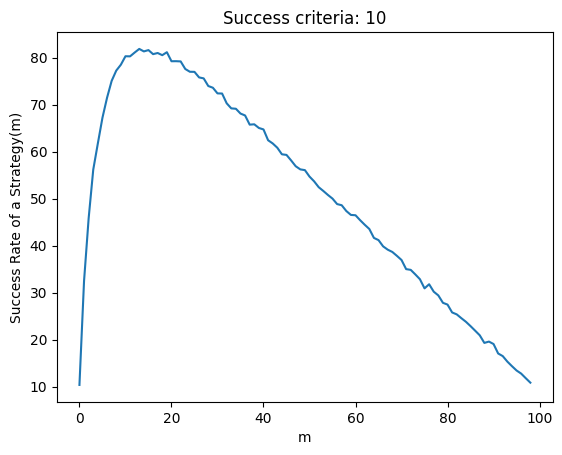

In [7]:
for s in s_range:
    print(f"Success criteria: {s}")
    mp = MarriageProblem(n, s)
    x = []
    y = []
    for m in range(0, n-1):
        x.append(m)
        y.append(mp.run(m, iterations=ITERATION))
    plot2D(x, y, xlabel="m", ylabel="Success Rate of a Strategy(m)", title=f"Success criteria: {s}", file_name=str(s))
    # plotHistogram(y, xlabel=f"Success rate. Criteria:{s}", ylabel="Frequency", title=f"Probability Distribution of Success of a Strategy(m)")